## Множества

In [1]:
A = {1,2,3,4,5,6,7} 
B = {4,5,6,7,8,9,10}
C = {2,4,6,8,10}
U = {1,2,3,4,5,6,7,8,9,10}

In [2]:
A.union(B) 

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [3]:
(A.union(B)).intersection(U - C) 

{1, 3, 5, 7, 9}

## Комбинаторика

**Задача 3.1.**
Сколько существует целых чисел между 0 и 999, содержащих ровно одну цифру 7?

Первый наивный подход

In [4]:
ans = 0
for i in range(1000):
    if len(set(str(i)) - set("7")) == 2:
        ans += 1
ans

456

Второй подход

In [5]:
ans = 0
for i in range(1000):
    if len(set(str(i))) - len(set(str(i)) - set("7")) == 1:
        ans += 1
ans

271

Решение

In [6]:
ans = 0
for i in range(1000):
    if sum([c == "7" for c in str(i)]) == 1:
        ans += 1
ans

243

**Задача 3.2.**
Проверьте результат [статьи](http://www.ams.org/journals/bull/1966-72-06/S0002-9904-1966-11654-3/S0002-9904-1966-11654-3.pdf), являющейся кандидатом на звание самой короткой публикации по математике:
$$
    27^5 + 84^5 + 110^5 + 133^5 = 144^5
$$
Это контрпример к гипотезе Эйлера, что для представления $𝑛$-й степени в виде суммы $𝑛$-х степеней нужно по крайней мере $𝑛$ слагаемых, $𝑛 > 2$.

**Решение 3.2.**

Для $a^3 + b^3 = c^3$ проверять не будем. Почему, кстати?


In [7]:
def check_4(N):
    for a in range(0, N):
        for b in range(1, N):
            for c in range(1, N):
                for d in range(1, N):
                    s = a**4 + b**4 + c**4
                    if s < d**4:
                        break
                    elif s == d**4:
                        return (a, b, c, d)

In [8]:
%%time
check_4(25)

CPU times: user 387 ms, sys: 2.11 ms, total: 390 ms
Wall time: 395 ms


In [9]:
%%time
check_4(50)

CPU times: user 6.44 s, sys: 234 µs, total: 6.44 s
Wall time: 6.53 s


In [10]:
%%time
check_4(100)

CPU times: user 1min 43s, sys: 4.96 ms, total: 1min 43s
Wall time: 1min 44s


In [11]:
95800**4 + 217519**4 + 414560**4 == 422481**4

True

**Наивное решение**

In [12]:
from tqdm import tqdm

def check_5(N):
    for a in tqdm(range(0, 2)):
        for b in range(0, N):
            for c in range(1, N):
                for d in range(1, N):
                    for e in range(1, N):
                        s = a**5 + b**5 + c**5 + d**5
                        if s < e**5:
                            break
                        elif s == e**5:
                            return (a, b, c, d, e)

In [13]:
%%time
check_5(200)

100%|██████████| 2/2 [1:10:10<00:00, 2100.35s/it]

CPU times: user 1h 9min 43s, sys: 322 ms, total: 1h 9min 44s
Wall time: 1h 10min 10s


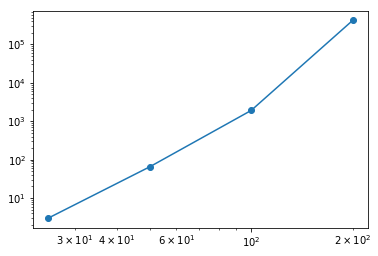

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

Ns = [25, 50, 100, 200]
check_5_times_s = [3, 65, 31*60+49, 100*(1*60*60 + 10*60 + 10)]
plt.plot(Ns, check_5_times_s, 'o-')
plt.xscale('log')
plt.yscale('log')
plt.show()

**Более разумное решение**
1. Сделать numpy-массив из пятых степеней целых чисел от 1 до N.
2. Выписать список сочетаний из четырёх чисел из этого массива.
3. В цикле проверить, попадает ли сумма степеней в исходный массив и вывести на экран, если да.

In [15]:
import numpy as np
from itertools import combinations

def check_5_faster(N):
    fifth_powers = np.array([i**5 for i in range(N)])
    four_combs = combinations(fifth_powers, 4)
    for c in four_combs:
        if sum(c) in fifth_powers:
            ans = list(c)
            ans.append(sum(c))
            print([int(x**0.2) for x in ans])

In [16]:
%%time
check_5_faster(200)

[27, 84, 110, 133, 144]
CPU times: user 5min 12s, sys: 43.9 ms, total: 5min 12s
Wall time: 5min 15s


## k-сочетания из n элементов

In [17]:
from scipy.special import comb

int(comb(N=9*9, k=15))

8144022047817960

**Задача 3.3.**
Сколько существует шестизначных чисел, сумма цифр которых не превосходит 47?

In [18]:
ans = 0
for number in range(10**5, 10**6):
    if sum(map(int, str(number))) <= 47:
        ans += 1
print(ans)

899076


**Задача 3.4.**
Cгенерируйте все возможные $k$-перестановки $n$-элементов без повторений.

In [19]:
from itertools import combinations, permutations, chain

def k_permutations(n, k):
    k_permutations = [permutations(c) for c in combinations(range(n), k)]
    return sorted(list(chain.from_iterable(k_permutations)))

In [20]:
print("Input two integers:n k")
n, k = map(int, input().split())
ans = k_permutations(n, k)
for e in ans:
    print(*e)

Input two integers:n k


 4 2


0 1
0 2
0 3
1 0
1 2
1 3
2 0
2 1
2 3
3 0
3 1
3 2


**Задача 3.5.** Найдите 2019-е число Фибоначчи.

In [21]:
import numpy as np
from numpy.linalg import matrix_power

def fib(n): 
    F = np.array([[1, 1], [1, 0]])
    if (n == 0): 
        return 0
    F = matrix_power(F, n - 1)       
    return F[0][0]

In [22]:
fib(2019)

161797205101391106

## Графы

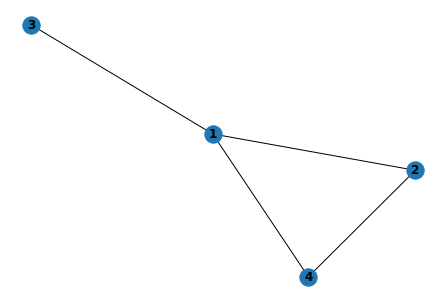

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

import networkx as nx
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 4)])
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

**Задача 3.6.**
Пусть G есть граф, построенный на вершинах 1,2,$\dots$,15, в котором вершины $i$ и $j$ смежны тогда и только тогда, когда их наибольший общий делитель больше единицы. Сколько компонент связности имеет такой граф?

4

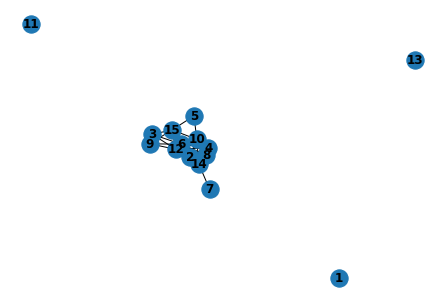

In [24]:
from math import gcd

G = nx.Graph()
nodes = range(1, 16)
G.add_nodes_from(nodes)
edges = [(i, j) for (i, j) in combinations(nodes, 2) if gcd(i, j) > 1]
G.add_edges_from(edges)
len(list(nx.connected_component_subgraphs(G)))
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

## Дискретная вероятность

**Задача 3.7.**
Сколько нужно бросков монетки в среднем, чтобы выпало подряд N орлов?

In [25]:
from numpy import random
from tqdm import tqdm

results = []
heads_amount = 2
for i in tqdm(range(10**6)):
    heads_rest = heads_amount
    count = 0
    while True:
        count += 1
        head = random.rand() > 0.5
        if head:
            heads_rest -= 1
        else:
            heads_rest = heads_amount
        if heads_rest == 0:
            results.append(count)
            break

100%|██████████| 1000000/1000000 [00:04<00:00, 225371.68it/s]


In [26]:
import numpy as np
np.mean(results)
np.std(results)

5.99186

4.682750232544975